# Spotify TOP Song Analysis and Visualization Project

**The following notebook is about the analysis of Spotify TOP songs in order to find interesting patterns between these top songs.**

# Main Results Dashboard:

- According to these results the TOP 100 spotify songs are characterized by:
    - Quite high popularity, danceability, energy and valance
    - Quite low values of liveness, acousticness and speechiness.<br>
- Among the 64 artists in the dataset:
    - 45 artists have just one song in the top 100. 
    - In pa Ed Sheeran has 5 distinct songs in the top 100.
    - Post Malone has 7 distinct songs in the top 100.
    - The Weeknd and Imagine Dragons have 4 distinct songs in the top 100.
- Therea re some similarities between Ed Sheeran and Post Malone songs, with very low values of speechiness and other values similar to the other artists. <br>In case of The Weeknd, we can see very low values of liveness compared to the other artists in the dataset.

<img src="https://i.imgur.com/olHiv7G.png">

<img src="https://i.imgur.com/YZUmkNb.png">

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

## Custom function definition:

In [3]:
def num_plot(df, col):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(col + 'distribution',fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_features_obj(df,string):
    fig, ax = plt.subplots(2,4, figsize=(18,9), sharey=True)
    fig.suptitle('TOP 100 songs musical attributes by Release Year', fontsize=40)
    g=sns.barplot(ax=ax[0,0], x=string, y= 'energy', data=df,ci=False, palette='rocket')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[0,0].set_title('energy')
    ax[0,0].set_xlabel('')
    ax[0,0].set_ylabel('')
    ax[0,0].tick_params(axis='y',labelsize=17)
    
    g=sns.barplot(ax=ax[0,1], x=string, y= 'danceability', data=df,ci=False, palette='crest_r')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[0,1].set_title('danceability')
    ax[0,1].set_ylabel('')
    ax[0,1].set_xlabel('')
    
    g=sns.barplot(ax=ax[0,2], x=string, y= 'liveness', data=df,ci=False, palette='magma')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[0,2].set_title('liveness')
    ax[0,2].set_ylabel('')
    ax[0,2].set_xlabel('')
    
    g=sns.barplot(ax=ax[0,3], x=string, y= 'valance', data=df,ci=False, palette='flare_r')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[0,3].set_title('valance')
    ax[0,3].set_ylabel('')
    ax[0,3].set_xlabel('')
    
    g=sns.barplot(ax=ax[1,0], x=string, y= 'acousticness', data=df,ci=False, palette='mako')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[1,0].set_title('acousticness')
    ax[1,0].set_ylabel('')
    ax[1,0].set_xlabel('')
    ax[1,0].tick_params(axis='y',labelsize=17)
    
    g=sns.barplot(ax=ax[1,1], x=string, y= 'speechiness', data=df,ci=False, palette='cubehelix')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[1,1].set_title('speechiness')
    ax[1,1].set_ylabel('')
    ax[1,1].set_xlabel('')

    
    g=sns.barplot(ax=ax[1,2], x=string, y= 'popularity', data=df,ci=False, palette='YlOrBr_r')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[1,2].set_title('popularity')
    ax[1,2].set_ylabel('')
    ax[1,2].set_xlabel('')
    
    ax=ax[1,3].axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
def plot_features(df, text, ax):
    ax.set_title('Musical Attributes densities of songs by ' + text)
    sns.kdeplot(x= 'energy', data=df, label='energy',ax=ax)
    sns.kdeplot(x= 'danceability', data=df, label='danceability',ax=ax)
    sns.kdeplot(x= 'liveness', data=df, label='liveness',ax=ax)
    sns.kdeplot(x= 'valance', data=df, label='valance',ax=ax)
    sns.kdeplot(x= 'acousticness', data=df, label='acousticness',ax=ax)
    sns.kdeplot(x= 'speechiness', data=df, label='speechiness',ax=ax)
    ax.set_xlabel('')
    ax.legend(fontsize=10, fancybox=True, shadow=True, frameon=True)
    
    plt.legend()

## Dataframe info

- acousticness: [0–1] Confidence measure of whether the track is acoustic.
- danceability: [0–1] Describes how suitable a track is for dancing based on musical attributes including tempo, rhythm, stability, beat strength, and overall regularity.
- energy: [0–1] Perceptual measure of intensity and activity. Energetic tracks feel fast, loud, and noisy (e.g. death metal: high energy, Bach prelude: low energy).
- instrumentalness: [0–1] Predicts whether a track contains no vocals (values above 0.5 represent instrumental tracks whereas rap songs would have a score close to 0).
- liveness: [0–1] Detects the presence of an audience in the recording.
- loudness: [-60–0 dB] The average volume across an entire track.
- speechiness: [0–1] Detects the presence of spoken words in a track (values above 0.66 describe tracks that are probably made entirely of spoken words, 0.33–0.66 describe tracks that may contain both music and speech, and values below 0.33 most likely represent music and other non-speech-like tracks).
- valence: [0–1] Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: [0–300 BPM] The speed or pace of a given piece, as derived from the estimated average beat duration.

In [6]:
df = pd.read_csv('Top 100 most Streamed - Sheet1.csv')

In [7]:
df.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             100 non-null    object
 1   artist            100 non-null    object
 2   top genre         100 non-null    object
 3   year              100 non-null    int64 
 4   beats.per.minute  100 non-null    int64 
 5   energy            100 non-null    int64 
 6   danceability      100 non-null    int64 
 7   loudness.dB       100 non-null    int64 
 8   liveness          100 non-null    int64 
 9   valance           100 non-null    int64 
 10  length            100 non-null    int64 
 11  acousticness      100 non-null    int64 
 12  speechiness       100 non-null    int64 
 13  popularity        100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB


In [9]:
df.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


We can see that each song is characterized by different numerical features. They will be anaylzed to see if TOP songs have some of these features in common.

# Exploratory Data Analysis

# Correlation Matrix

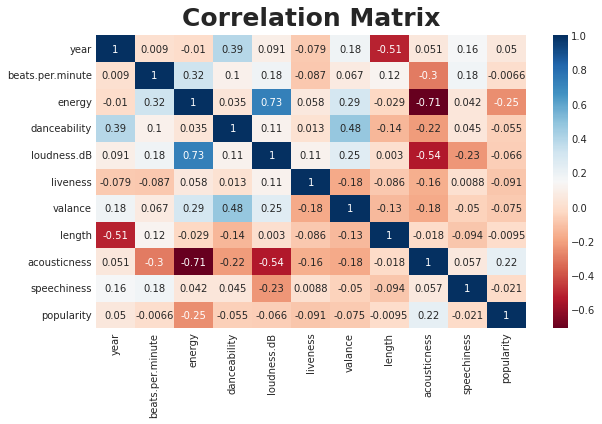

In [10]:
plt.figure(figsize=(9,6))
plt.title('Correlation Matrix', fontsize=25)
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.show()

From the correlation matrix we can say:

- High positive correlation between loudness and energy (+0.73)
- High negative correlation between acousticness and energy (-0.71)
- Fairly high positive correlation between valance and danceability (+0.48)
- Failry high negative correlation between loudness and acousticness (-0.54)

# Release year 

First, the year column will be analyzed. The conclusions that will be made about years and their impact on the musical features will be confined to these 100 songs. This means that possible trends related to the release year of the songs could not be true for all songs released during that year but just by analyzing this dataset. Nonetheless, it is still intersting to see if some patterns or insigths can be found by just looking at this data.

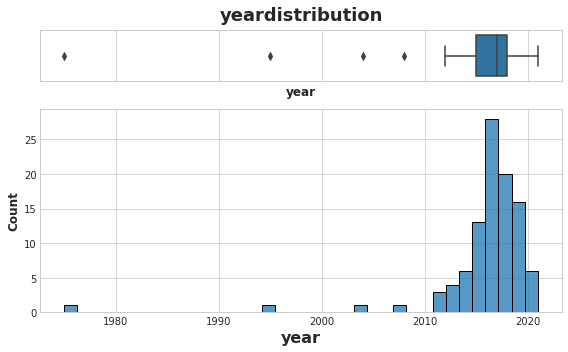

In [11]:
num_plot(df,'year')

There are some outliers, identified by a release year prior to 2010.

In [12]:
df[df['year'] < 2010]

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
44,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975,71,40,41,-10,30,22,354,27,5,81
53,Mr. Brightside,The Killers,alternative rock,2004,148,91,35,-5,10,24,223,0,7,81
68,I'm Yours,Jason Mraz,acoustic pop,2008,151,46,69,-8,11,72,242,60,5,80
82,Wonderwall - Remastered,Oasis,beatlesque,1995,174,90,38,-4,19,47,259,0,4,77


There are 4 'old' songs (in tersm of release data). In particular, two of them are remastered of original songs (Bohemian Rhapsody and Wonderwall).

These 4 songs will be removed from the dataset, in order to improve the readability of the next plots.

In [13]:
df_clean = df.loc[df['year'] > 2010]

In [14]:
df_clean['year']

0     2020
1     2019
2     2021
3     2019
4     2017
      ... 
95    2016
96    2015
97    2021
98    2018
99    2016
Name: year, Length: 96, dtype: int64

Is there a relationship between the numerical musical features and the release year?

# BPM by release year

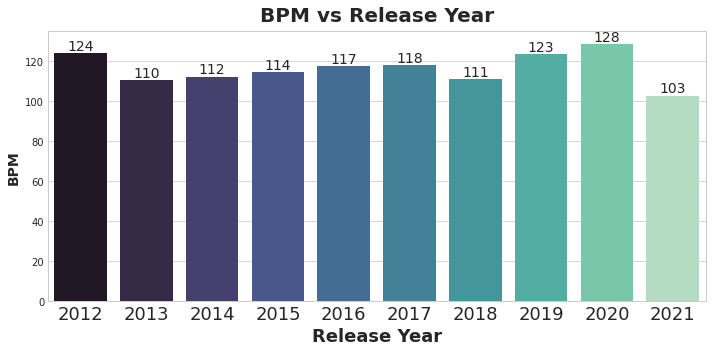

In [15]:
plt.figure(figsize=(10,5))
g=sns.barplot(x='year', y= 'beats.per.minute', data=df_clean,ci=False, palette='mako')
g.bar_label(g.containers[0], fmt='%.0f',fontsize=14)
plt.ylabel('BPM', fontsize=14)
plt.xticks(fontsize=18)
plt.xlabel('Release Year', fontsize=18)
plt.title('BPM vs Release Year', fontsize=20)
plt.show()

**We can see a small increasing trend for BPM between the years 2013 and 2020. In 2021 we can see a quite low BPM compared to the other years.**

# Song duration by release year

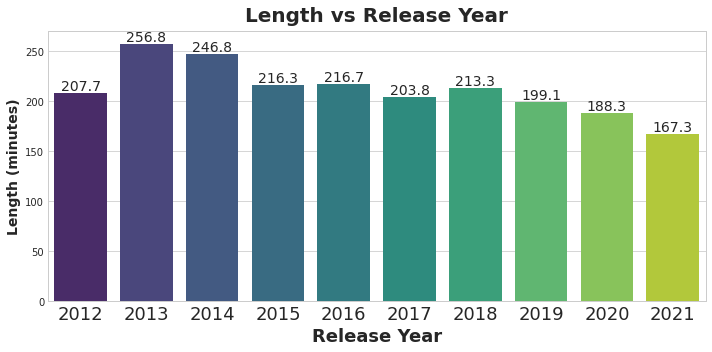

In [16]:
plt.figure(figsize=(10,5))
g=sns.barplot(x='year', y= 'length', data=df_clean, ci=False, palette='viridis')
g.bar_label(g.containers[0], fmt='%.1f', fontsize=14)
plt.ylabel('Length (minutes)', fontsize=14)
plt.xticks(fontsize=18)
plt.xlabel('Release Year', fontsize=18)
plt.title('Length vs Release Year', fontsize=20)
plt.show()

**There is a quite negative trend for what concerns songs length during the years.**

# Song loudness by release year

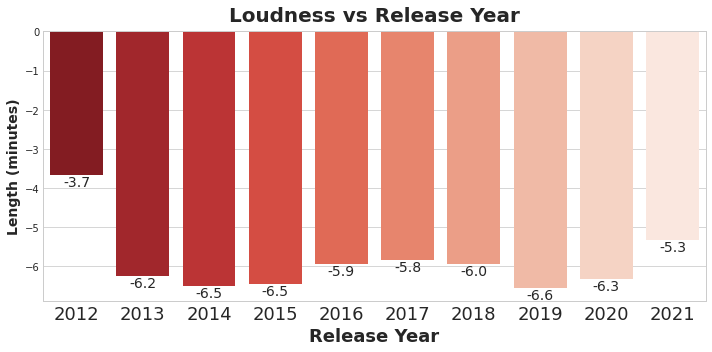

In [17]:
plt.figure(figsize=(10,5))
g=sns.barplot(x='year', y= 'loudness.dB', data=df_clean, ci=False, palette='Reds_r')
g.bar_label(g.containers[0], fmt='%.1f', fontsize=14)
plt.ylabel('Length (minutes)', fontsize=14)
plt.xticks(fontsize=18)
plt.xlabel('Release Year', fontsize=18)
plt.title('Loudness vs Release Year', fontsize=20)
plt.show()

**There is no clear trend in the loudness. We can see that the loudness of TOP songs in 2021 quite descreased compared to top songs in 2019 and 2020.**

# Musical attributes by release year

In the following, musical numerical features will be analyzed and compared to the release year of the songs.

In [18]:
df_clean.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


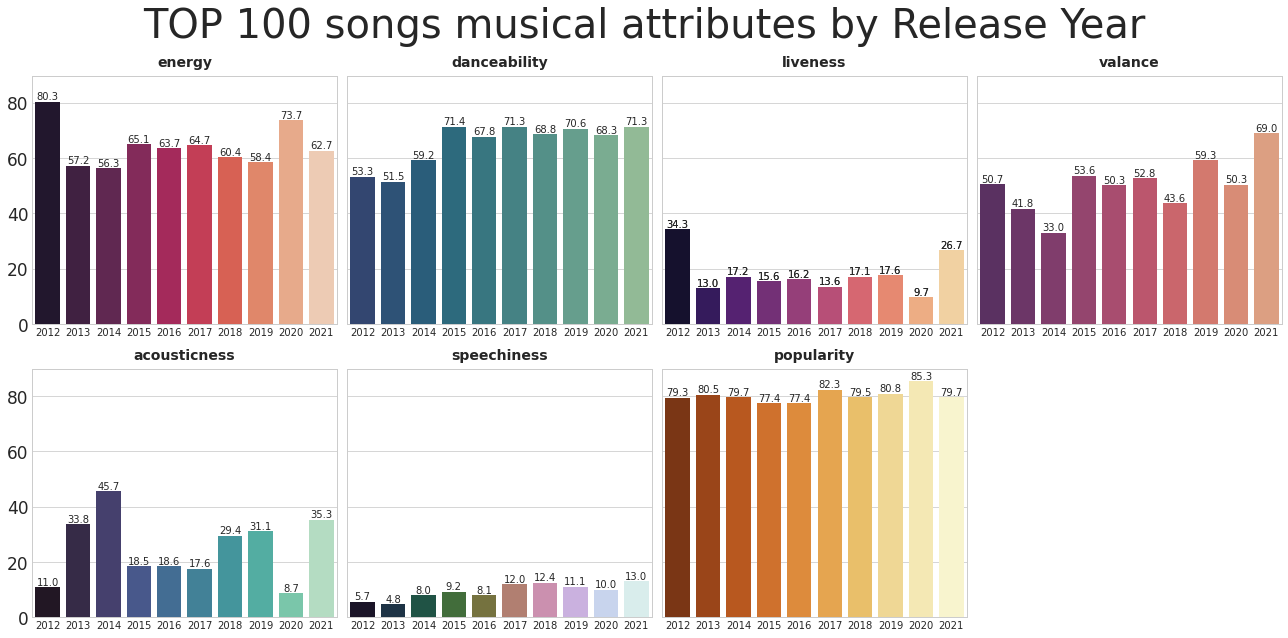

In [19]:
plot_features_obj(df_clean,'year')

We can see that danceability and speechiness in songs increased during the years.<br>
Valance as well has a small increasing trend by years and liveness and acousticness have a very wide range of values for the year 2021, and the mean looks quite high comparing to other years.

# Mean musical attributes

First, we create a dataframe including the musical features only.

In [20]:
df_feat = df_clean.drop(['year','artist','top genre','title','loudness.dB','length','beats.per.minute'], axis=1)

In [22]:
df_mean = pd.DataFrame(df_feat.mean().sort_values(ascending=False).reset_index())
df_mean.rename(columns={ df_mean.columns[1]: "value" }, inplace = True)

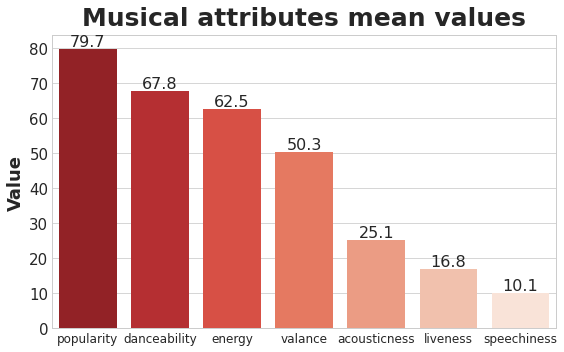

In [23]:
plt.figure(figsize=(8,5))
plt.title('Musical attributes mean values', fontsize=25)
g = sns.barplot(x='index', y='value', data=df_mean, palette='Reds_r')
g.bar_label(g.containers[0], fmt='%.1f', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.ylabel('Value', fontsize=18)
plt.yticks(fontsize=15)
plt.show()

According to these plots, the TOP 100 spotify songs are characterized by:
- Quite high popularity, danceability, energy and valance
- Quite low values of liveness, acousticness and speechiness.<br>

# Songs by artist analysis

# Are there artists with multiple songs than one song in the 100 chart?

In [24]:
df['artist'].value_counts()

Post Malone        7
Ed Sheeran         5
The Weeknd         4
Imagine Dragons    4
Shawn Mendes       3
                  ..
DJ Snake           1
Mark Ronson        1
Lauv               1
The Killers        1
Mike Posner        1
Name: artist, Length: 64, dtype: int64

In [25]:
df['artist'].nunique()

64

In the dataset there are 64 different artists

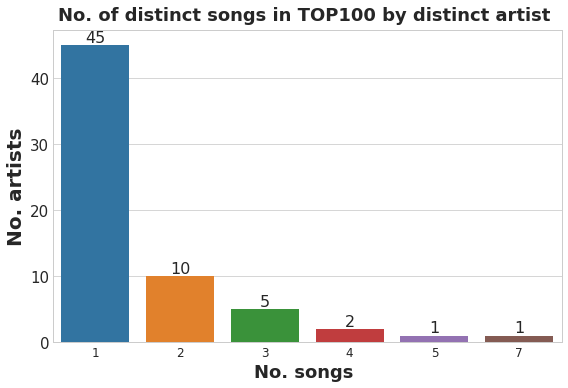

In [26]:
plt.figure(figsize=(8,5.5))
plt.title('No. of distinct songs in TOP100 by distinct artist ', fontsize=18)
g = sns.countplot(df['artist'].value_counts(ascending=True).values)
g.bar_label(g.containers[0], fmt='%.0f', fontsize=16)
plt.ylabel('No. artists', fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel('No. songs ', fontsize=18)
plt.yticks(fontsize=15)
plt.show()

**We can see that 45 artists out of 64 just have just one song in the top 100, while 2 have 5 and 7 songs respecitvely.**

# Which are the artists with more than one song in the top 100?

In [27]:
df_art = df['artist'].value_counts()

In [28]:
top_art = df_art[df_art > 1]
top_art

Post Malone          7
Ed Sheeran           5
The Weeknd           4
Imagine Dragons      4
Shawn Mendes         3
Billie Eilish        3
Maroon 5             3
The Chainsmokers     3
Justin Bieber        3
Travis Scott         2
Luis Fonsi           2
Drake                2
Dua Lipa             2
Twenty One Pilots    2
Ariana Grande        2
XXXTENTACION         2
Sam Smith            2
Major Lazer          2
Charlie Puth         2
Name: artist, dtype: int64

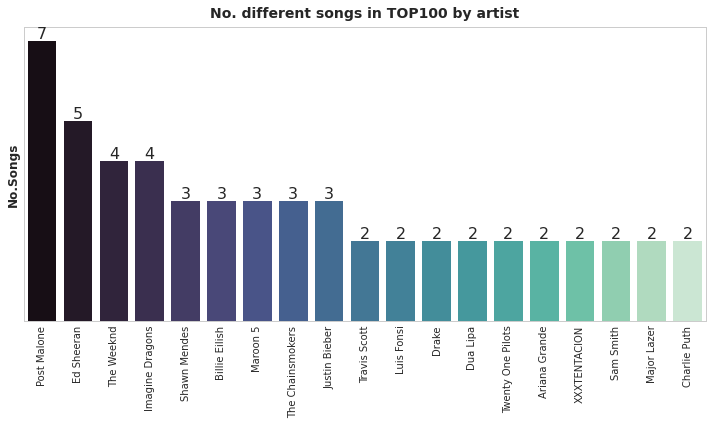

In [29]:
plt.figure(figsize=(10,6))
plt.title('No. different songs in TOP100 by artist')
g=sns.barplot(top_art.index, top_art, palette='mako')
g.bar_label(g.containers[0], fmt='%.0f', fontsize=16)
plt.xticks(rotation=90)
plt.yticks([])
plt.ylabel('No.Songs')
plt.show()

**We can see that post Malone has 7 songs in top 10, Ed Sheeran has 5, then both The Weekend and Imagine Draongs have 4. The other artists in this top artist dataframe has either 3 or 2 songs**

# TOP artists analysis

Let's analyze the songs by TOP 3 artists (in terms of number of songs in the TOP 100 list).

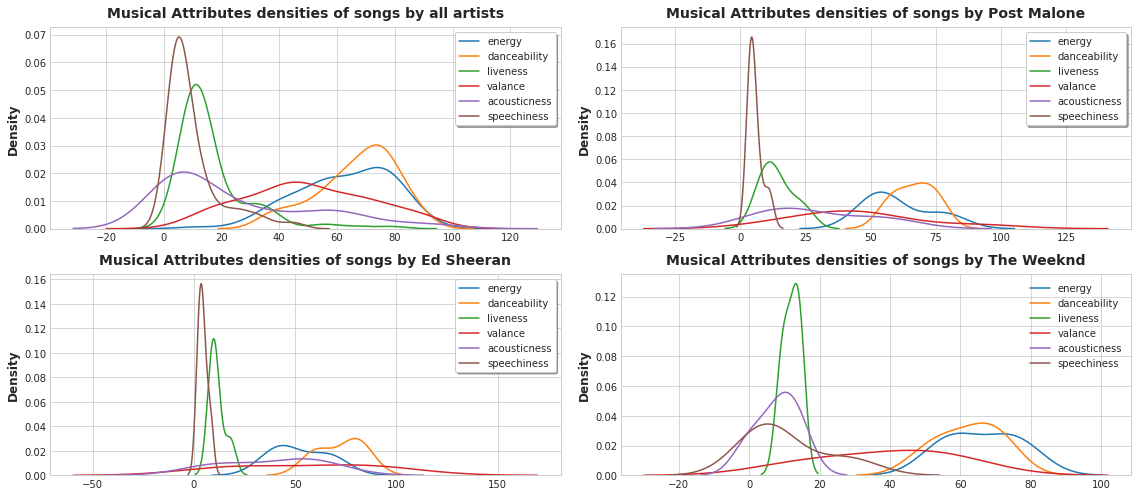

In [30]:
_, ax = plt.subplots(2,2, figsize=(16,7))
plot_features(df,'all artists',ax[0,0])
plot_features(df[df['artist']== 'Post Malone'],'Post Malone',ax[0,1])
plot_features(df[df['artist']== 'Ed Sheeran'],'Ed Sheeran',ax[1,0])
plot_features(df[df['artist']== 'The Weeknd'],'The Weeknd',ax[1,1])
plt.show()

**From these plots, we can see some similarities between Ed Sheeran and Post Malone songs, with very low values of speechiness and other values similar to the other artists.<br> In case of The Weeknd, we can see very low values of liveness compared to the other artists in the dataset.**